In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names=['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
data = pd.read_csv(url,names=names)

In [3]:
data.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
#Checking for null values, none found
data.isnull().sum()

Pregnancies         0
Glucose             0
BP                  0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BP                768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

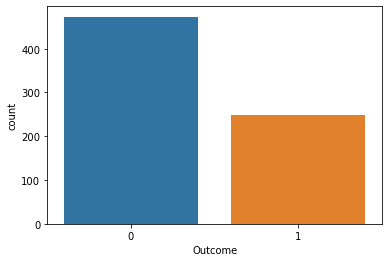

In [52]:
sns.countplot(data.Outcome)

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

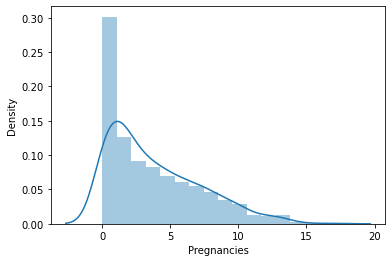

In [7]:
sns.distplot(data['Pregnancies'])

<AxesSubplot:xlabel='Pregnancies'>

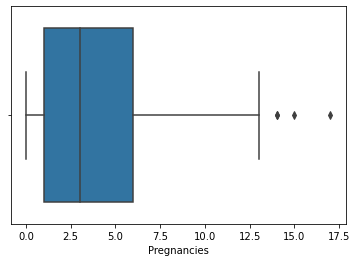

In [8]:
sns.boxplot(data['Pregnancies'])

In [9]:
data.loc[data.Pregnancies>13]

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [10]:
data.drop(data[data['Pregnancies'] > 13].index, inplace = True)
data.shape

(764, 9)

<AxesSubplot:xlabel='Glucose'>

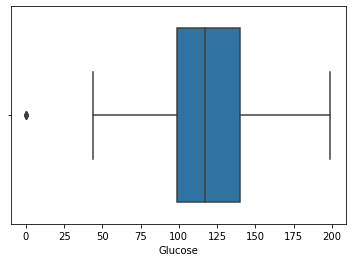

In [11]:
# On some rows glucose value is 0
sns.boxplot(data.Glucose)

In [12]:
data.loc[data.Glucose==0]

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [13]:
# As there are only 4 rows with ) glucose value deleting these rows
data.drop(data[data['Glucose']==0].index, inplace = True)
data.shape

(759, 9)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

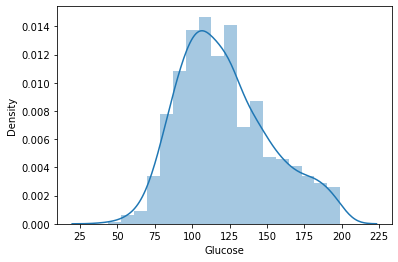

In [14]:
sns.distplot(data.Glucose)

<AxesSubplot:xlabel='BP', ylabel='Density'>

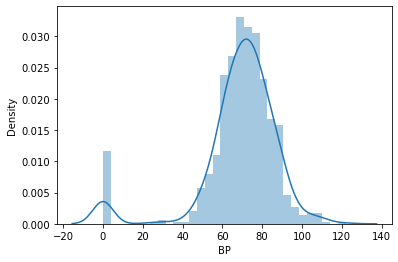

In [15]:
# For many rows BP is 0. But 0 BP does not make any sense so it might be the case that for these people BP value was
# not available.
sns.distplot(data.BP)

In [16]:
data.loc[data.BP==0].shape

(35, 9)

In [17]:
# As this is small dataset replacing 0 BP values with median
data.BP = data.BP.replace(0,data.BP.median())

<AxesSubplot:xlabel='BP'>

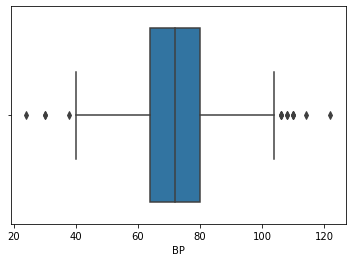

In [18]:
# Outliers are still present for BP
sns.boxplot(data.BP)

In [19]:
data.loc[(data.BP<=40)|(data.BP>=113)]

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
18,1,103,30,38,83,43.3,0.183,33,0
106,1,96,122,0,0,22.4,0.207,27,0
125,1,88,30,42,99,55.0,0.496,26,1
597,1,89,24,19,25,27.8,0.559,21,0
599,1,109,38,18,120,23.1,0.407,26,0
691,13,158,114,0,0,42.3,0.257,44,1


In [20]:
data.drop(data[data.BP<=40].index, inplace = True)
data.drop(data[data.BP>=113].index, inplace = True)

data.shape

(752, 9)

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

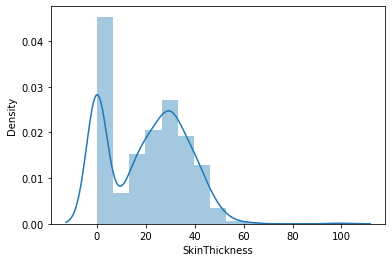

In [21]:
sns.distplot(data.SkinThickness)

In [22]:
data.loc[data['SkinThickness']==0].shape

(225, 9)

In [23]:
# Out of 752 rows 225 have skinthickness as 0 so dropping this column
data.drop('SkinThickness',axis=1,inplace=True)

In [24]:
data.shape

(752, 8)

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

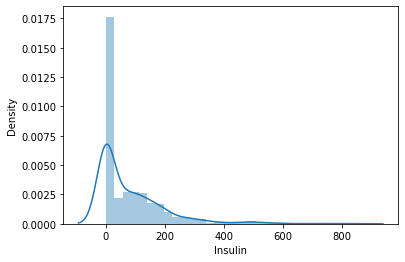

In [25]:
sns.distplot(data.Insulin)

In [26]:
data_ins = data.loc[data.Insulin!=0]
data_ins.shape

(385, 8)

In [27]:
data_ins.loc[data_ins.Outcome==1].Insulin.median()

175.0

In [28]:
data_ins.loc[data_ins.Outcome==0].Insulin.median()

105.0

In [29]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin']==0), 'Insulin'] = 105.0
data.loc[(data['Outcome'] == 1 ) & (data['Insulin']==0), 'Insulin'] = 175.0

<AxesSubplot:xlabel='BMI', ylabel='Density'>

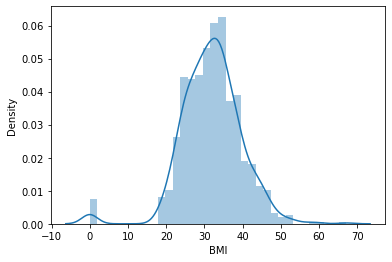

In [30]:
sns.distplot(data.BMI)

In [31]:
data.loc[data.BMI==0]

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigree,Age,Outcome
9,8,125,96,175,0.0,0.232,54,1
49,7,105,72,105,0.0,0.305,24,0
60,2,84,72,105,0.0,0.304,21,0
81,2,74,72,105,0.0,0.102,22,0
145,0,102,75,105,0.0,0.572,21,0
371,0,118,64,89,0.0,1.731,21,0
426,0,94,72,105,0.0,0.256,25,0
494,3,80,72,105,0.0,0.174,22,0
522,6,114,72,105,0.0,0.189,26,0
684,5,136,82,105,0.0,0.640,69,0


In [32]:
data.BMI.median()

32.0

In [33]:
data.BMI = data.BMI.replace(0,data.BMI.median())

<AxesSubplot:xlabel='BMI'>

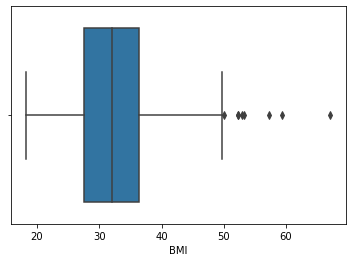

In [34]:
sns.boxplot(data.BMI)

In [35]:
data.loc[data.BMI>50]

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigree,Age,Outcome
120,0,162,76,100,53.2,0.759,25,1
177,0,129,110,130,67.1,0.319,26,1
193,11,135,72,175,52.3,0.578,40,1
247,0,165,90,680,52.3,0.427,23,0
303,5,115,98,175,52.9,0.209,28,1
445,0,180,78,14,59.4,2.420,25,1
673,3,123,100,240,57.3,0.880,22,0


In [36]:
data.drop(data[data.BMI>50].index, inplace = True)

In [37]:
data.shape

(745, 8)

<AxesSubplot:xlabel='DiabetesPedigree', ylabel='Density'>

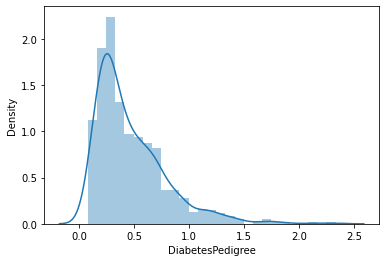

In [38]:
sns.distplot(data['DiabetesPedigree'])

In [39]:
data.head()

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,175,33.6,0.627,50,1
1,1,85,66,105,26.6,0.351,31,0
2,8,183,64,175,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
5,5,116,74,105,25.6,0.201,30,0


In [44]:
data.DiabetesPedigree = np.sqrt(data.DiabetesPedigree)

<AxesSubplot:xlabel='DiabetesPedigree', ylabel='Density'>

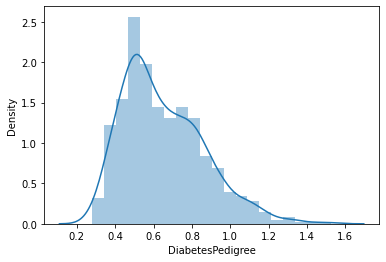

In [45]:
sns.distplot(data.DiabetesPedigree)

<AxesSubplot:xlabel='DiabetesPedigree'>

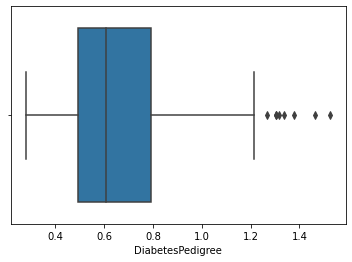

In [46]:
sns.boxplot(data.DiabetesPedigree)

In [47]:
data.drop(data[data.DiabetesPedigree>1.2].index, inplace = True)
data.shape

(734, 8)

<AxesSubplot:xlabel='Age'>

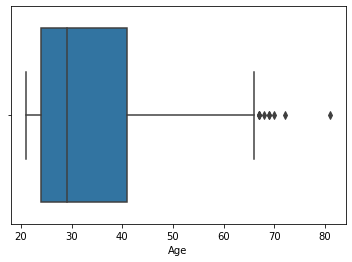

In [50]:
sns.boxplot(data.Age)

In [51]:
data.drop(data[data.Age>65].index, inplace = True)
data.shape

(721, 8)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

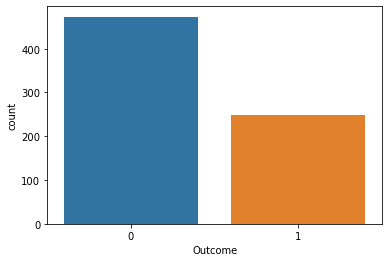

In [53]:
sns.countplot(data.Outcome)

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

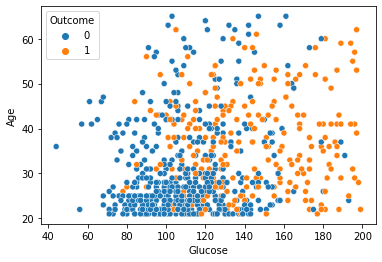

In [56]:
sns.scatterplot(data=data, x="Glucose", y="Age", hue="Outcome")
# With increase in age glucose increases and chances of diabetes increases

<AxesSubplot:>

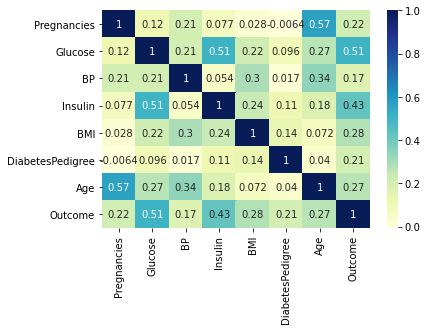

In [58]:
sns.heatmap(data.corr(), fmt='.2g', annot=True, cmap = 'YlGnBu')

#No significant correlation

In [59]:
data.head()

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,175,33.6,0.791833,50,1
1,1,85,66,105,26.6,0.592453,31,0
2,8,183,64,175,23.3,0.819756,32,1
3,1,89,66,94,28.1,0.408656,21,0
5,5,116,74,105,25.6,0.448330,30,0


In [60]:
feature_space = data.iloc[:, data.columns != 'Outcome']
feature_class = data.iloc[:, data.columns == 'Outcome']

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)

In [63]:
fit_rf = RandomForestClassifier(random_state=42)

In [65]:
import time

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))



Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  69.74


In [66]:
# Set best parameters given by grid search 
fit_rf.set_params(bootstrap=True,
                  criterion = 'entropy',
                  max_features = None, 
                  max_depth = 4)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       random_state=42)

In [67]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [68]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

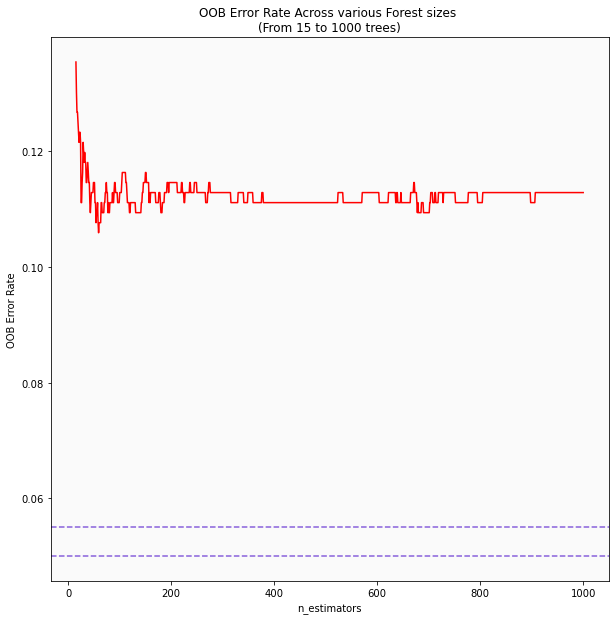

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [70]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       n_estimators=200, random_state=42)

In [71]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       n_estimators=200, random_state=42)

In [ ]:
predictions_rf = fit_rf.predict(test_set)

In [90]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.883


In [93]:
test_set

,Pregnancies,Glucose,BP,Insulin,BMI,DiabetesPedigree,Age
277,0,104,64,116,27.8,0.673795,23
704,4,110,76,100,28.4,0.343511,27
83,0,101,65,105,24.6,0.486826,22
70,2,100,66,90,32.9,0.931128,28
87,2,100,68,71,38.5,0.569210,26
...,...,...,...,...,...,...,...
456,1,135,54,105,26.7,0.828855,62
147,2,106,64,119,30.5,1.183216,34
283,7,161,86,175,30.4,0.406202,47
7,10,115,72,105,35.3,0.366060,29


In [94]:
test_class_set

,Outcome
277,0
704,0
83,0
70,1
87,0
...,...
456,0
147,0
283,1
7,0


In [92]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(training_set, class_set)

LogisticRegression()

In [101]:
y_pred_lr=logreg.predict(test_set)

In [102]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [103]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_class_set, y_pred_lr)
cnf_matrix

array([[88,  8],
       [20, 29]])

Text(0.5, 257.44, 'Predicted label')

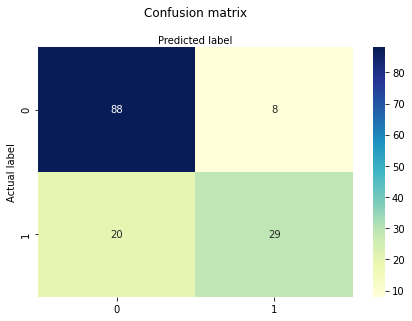

In [104]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
print("Accuracy:",metrics.accuracy_score(test_class_set, y_pred_lr))
print("Precision:",metrics.precision_score(test_class_set, y_pred_lr))
print("Recall:",metrics.recall_score(test_class_set, y_pred_lr))

Accuracy: 0.8068965517241379
Precision: 0.7837837837837838
Recall: 0.5918367346938775


In [107]:
import joblib

joblib.dump(fit_rf, 'diabetes_model.pkl')

['diabetes_model.pkl']